In [133]:
import warnings
warnings.filterwarnings('ignore')

# IMPORTING PACKAGES

import pandas as pd 
import numpy as np 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [89]:
df = pd.read_excel('Dataset/default of credit card clients.xls', header=[0])

In [90]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.<br>
<br>
<b>Attribute Information:</b><br>
<br>
There are 25 variables:
<br>
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [91]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

The dataset doesn't have any missing values

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [93]:
df=df.rename(columns={'default payment next month':'default'})
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

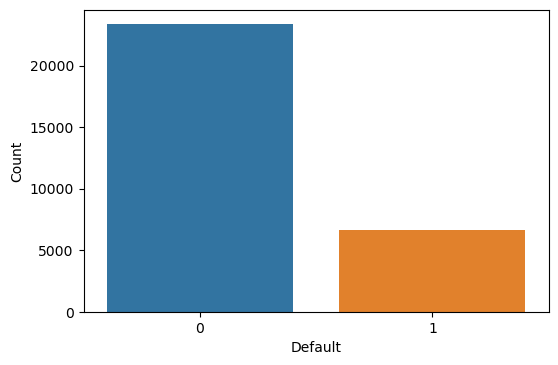

In [94]:
plt.figure(dpi=100)
sns.countplot(x="default", data=df)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

In [95]:
df2 = df.copy()

In [96]:
def sex1(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
df2['SEX']=df['SEX'].apply(sex1)

In [97]:
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,Female,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


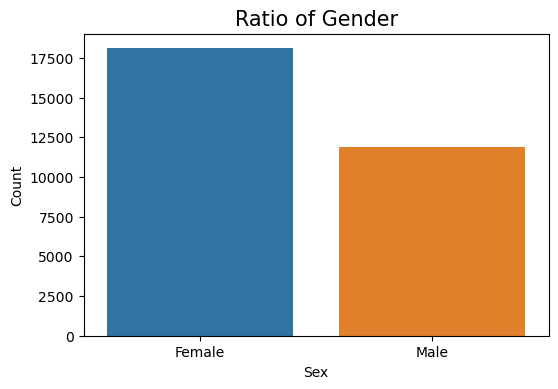

In [98]:
plt.figure(dpi=100)
df2['SEX'].value_counts()
sns.countplot(x="SEX", data=df2)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [99]:
df2['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [100]:
def edu(x):
    if (x==0) or (x==5) or (x==6):
        x=4
    return x
df['EDUCATION']=df['EDUCATION'].apply(edu)
df2['EDUCATION']=df2['EDUCATION'].apply(edu)

In [101]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
df2['EDUCATION']=df2['EDUCATION'].apply(edu1)

In [102]:
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,Female,University,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High School,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High School,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


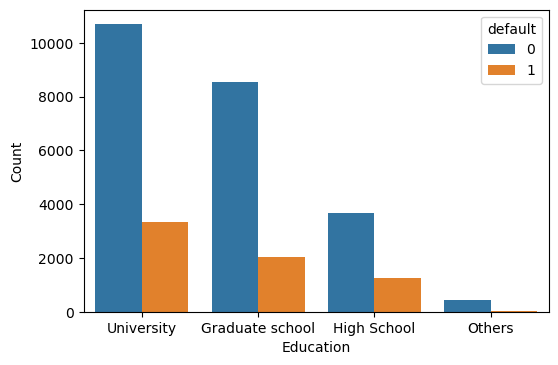

In [103]:
plt.figure(dpi=100)
df2['EDUCATION'].value_counts()
sns.countplot(x="EDUCATION", hue="default", data=df2)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

In [104]:
df['MARRIAGE'].value_counts()


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [105]:
def marriage(x):
    if (x==0):
        x=3
    return x
df['MARRIAGE']=df['MARRIAGE'].apply(marriage)
df2['MARRIAGE']=df2['MARRIAGE'].apply(marriage)

In [106]:
def marriage1(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
df2['MARRIAGE']=df2['MARRIAGE'].apply(marriage1)

In [107]:
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


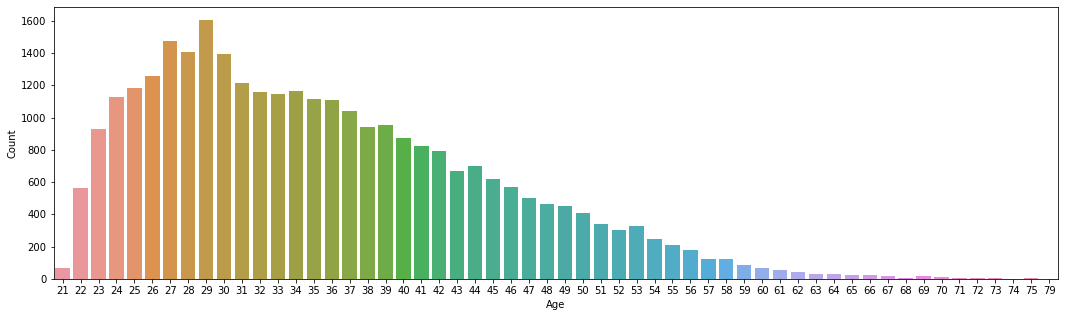

In [108]:
plt.figure(figsize=(18,5))
age=df2['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [109]:
# Dropping unnecessary column
df.drop(['ID'], axis=1, inplace=True)

In [115]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
df=df.apply(outlier_capping)

In [116]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0000,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0000,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0000,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0000,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0000,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0000,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0000,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37.0,3.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0000,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,66513.0918,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  float64
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

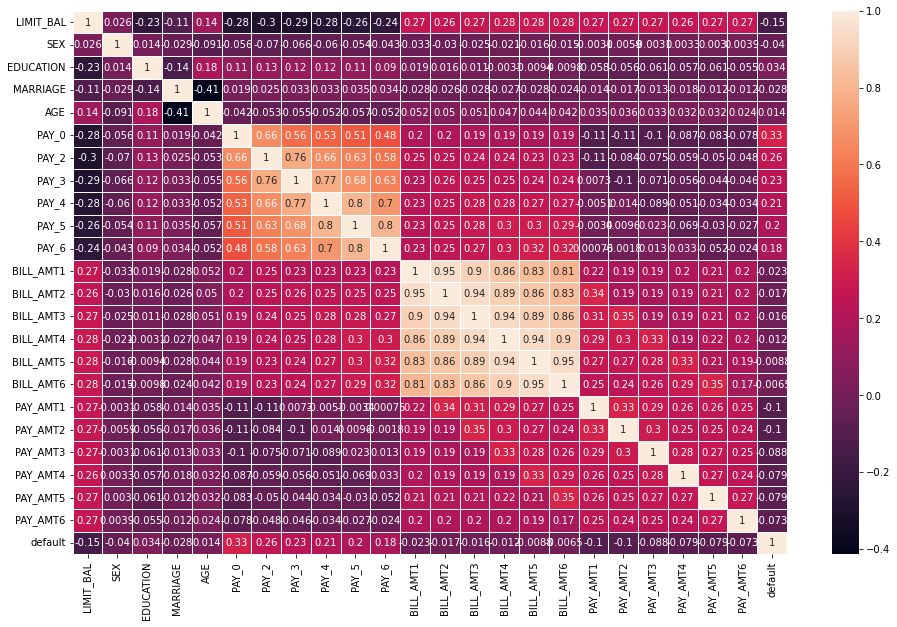

In [118]:
plt.figure (figsize= (16,10))
sns.heatmap(df.corr(),linewidths=.5,annot=True)
plt.show()

In [120]:
# One-hot encoding
df1=df.copy()
df1 = pd.get_dummies(df1, columns=["SEX"])
df1 = pd.get_dummies(df1, columns=["EDUCATION"])
df1 = pd.get_dummies(df1, columns=["MARRIAGE"])

In [121]:
df1

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,1,0,1,0,1,0,0,1,0,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,1,0,1,0,1,0,0,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,0,1,0,1,0,0,0,1,0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,0,1,0,1,0,0,1,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,...,0,1,0,0,0,1,0,1,0,0
29996,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,...,0,1,0,0,0,1,0,0,1,0
29997,30000.0,37.0,3.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,...,1,1,0,0,1,0,0,0,1,0
29998,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-81.0,78379.0,...,1,1,0,0,0,1,0,1,0,0


In [122]:
target = df1[['default']]
features = df1.drop('default', axis=1)
data_final = pd.concat([features, target], axis=1)

In [124]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=42)

Logistic Regression

In [129]:
accuracy={}
model = LogisticRegression()
model.fit(train_X, train_y)

train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

print(classification_report(train_pred, train_y))
print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, train_y))

print(classification_report(test_pred, test_y))
print('\nAccuracy Score for model1(testing): ', accuracy_score(test_pred, test_y))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     20985
           1       0.00      0.53      0.00        15

    accuracy                           0.78     21000
   macro avg       0.50      0.66      0.44     21000
weighted avg       1.00      0.78      0.87     21000


Accuracy Score for model1(training):  0.7773809523809524
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      8996
           1       0.00      0.75      0.00         4

    accuracy                           0.78      9000
   macro avg       0.50      0.77      0.44      9000
weighted avg       1.00      0.78      0.88      9000


Accuracy Score for model1(testing):  0.7824444444444445


KNN

In [130]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

In [131]:
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [134]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

In [135]:
model.best_score_

0.7825391690604044

In [136]:
model.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [137]:
train_pred2 = model.predict(std_data_train)
test_pred2 = model.predict(std_data_test)

In [139]:
print(classification_report(train_y, train_pred2))
print('\nAccuracy Score for model2(training): ', accuracy_score(train_pred2, train_y))

print(classification_report(test_y, test_pred2))
print('\nAccuracy Score for model2(testing): ', accuracy_score(test_pred2, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16324
           1       1.00      1.00      1.00      4676

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Accuracy Score for model2(training):  0.9995238095238095
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7040
           1       0.60      0.32      0.41      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000


Accuracy Score for model2(testing):  0.8054444444444444


Decision Tree

In [140]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [141]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [142]:
tree.best_score_

0.8023809523809524

In [143]:
tree.best_params_

{'max_depth': 3, 'max_features': 3}

In [144]:
d_tree = DecisionTreeClassifier( max_depth = 3, max_features=3, criterion='entropy' )
train_X = train_X[train_X.columns.difference(['pred_prob'])]
test_X = test_X[test_X.columns.difference(['pred_prob'])]
d_tree.fit( train_X, train_y )

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

In [146]:
train_pred1 = d_tree.predict(train_X)
test_pred1 = d_tree.predict(test_X)

In [148]:
print(classification_report(train_y, train_pred1))
print('\nAccuracy Score for model3(training): ', accuracy_score(train_pred1, train_y))

print(classification_report(test_y, test_pred1))
print('\nAccuracy Score for model3(testing): ', accuracy_score(test_pred1, test_y))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     16324
           1       0.65      0.18      0.28      4676

    accuracy                           0.80     21000
   macro avg       0.73      0.57      0.58     21000
weighted avg       0.77      0.80      0.75     21000


Accuracy Score for model3(training):  0.7957619047619048
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7040
           1       0.65      0.16      0.26      1960

    accuracy                           0.80      9000
   macro avg       0.73      0.57      0.57      9000
weighted avg       0.77      0.80      0.75      9000


Accuracy Score for model3(testing):  0.7981111111111111


In [159]:
rf_clas = RandomForestClassifier(n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
rf_clas.fit( train_X, train_y )

RandomForestClassifier(max_depth=10, max_features=4, n_jobs=-1)

In [160]:
train_pred5 = rf_clas.predict(train_X)
test_pred5 = rf_clas.predict(test_X)

In [161]:
print(classification_report(train_y, train_pred5))
print('\nAccuracy Score for model5(training): ', accuracy_score(train_pred5, train_y))

print(classification_report(test_y, test_pred5))
print('\nAccuracy Score for model5(testing): ', accuracy_score(test_pred5, test_y))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     16324
           1       0.85      0.45      0.59      4676

    accuracy                           0.86     21000
   macro avg       0.85      0.71      0.75     21000
weighted avg       0.86      0.86      0.84     21000


Accuracy Score for model5(training):  0.8595238095238096
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model5(testing):  0.8201111111111111


In [155]:
xgb = XGBClassifier(n_estimators=3000, max_depth=1, 
                    learning_rate=0.01, booster='gbtree', 
                    n_jobs=-1)
xgb.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=3000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [156]:
train_pred6 = xgb.predict(train_X)
test_pred6 = xgb.predict(test_X)

In [158]:
print(classification_report(train_y, train_pred5))
print('\nAccuracy Score for model6(training): ', accuracy_score(train_pred6, train_y))

print(classification_report(test_y, test_pred5))
print('\nAccuracy Score for model6(testing): ', accuracy_score(test_pred6, test_y))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     16324
           1       0.84      0.45      0.59      4676

    accuracy                           0.86     21000
   macro avg       0.85      0.71      0.75     21000
weighted avg       0.86      0.86      0.84     21000


Accuracy Score for model6(training):  0.8194761904761905
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.34      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000


Accuracy Score for model6(testing):  0.8176666666666667


In [162]:
lr=accuracy_score(test_pred, test_y)*100
knn=accuracy_score(test_pred2, test_y)*100
dt=accuracy_score(test_pred1, test_y)*100
rf=accuracy_score(test_pred5, test_y)*100
xgb=accuracy_score(test_pred6, test_y)*100

lr1=accuracy_score(train_pred, train_y)*100
knn1=accuracy_score(train_pred2, train_y)*100
dt1=accuracy_score(train_pred1, train_y)*100
rf1=accuracy_score(train_pred5, train_y)*100
xgb1=accuracy_score(train_pred6, train_y)*100

In [163]:
dict_train={"Logistic Regression":lr1, "KNN":knn1, "Decision Tree":dt1, "Random Forest":rf1, "XGBoost":xgb1}
dict_test={"Logistic Regression":lr, "KNN":knn, "Decision Tree":dt, "Random Forest":rf, "XGBoost":xgb}

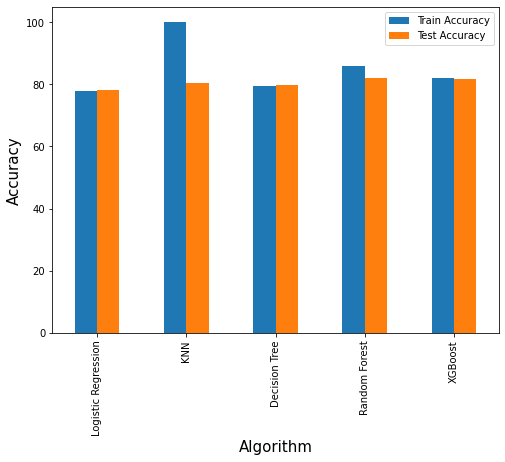

In [164]:
plot1=pd.DataFrame([dict_train,dict_test], index=['Train Accuracy','Test Accuracy']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()